# Understanding the results of a vaccine study

**BioNTech and Pfizer** developed a mRNA based vaccine that is highly effective in preventing COVID-19. Their research was published in an article in **[the New England Journal of Medicine](https://www.nejm.org/)** titled *[Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine](https://www.nejm.org/doi/full/10.1056/nejmoa2034577)*. In the article, they talk in detail about their research methodology and outcome of the study.
These are the results.


| Group| Participant| Infected|
| :----: | :----: | :----: |
| Treatment| 21,720| 8|
| Control| 21,728| 162|

How do we interpret the data?

# Experimental Design:
In this example, we want to understand the effectiveness of the vaccine to prevent the infection. A basic setting can be done with just two variables.
1. Treatment variable: This can also be called as the independent variable. We can control which individual will get the treatment and who will get the placebo.
2. Outcome variable: This is the dependent variable. For this study, whether a person is being infected or not can be the outcome variable.

There are steps we can take to remove biases and improve the quality of experiment. I will not talk about these in this article. I am focusing on the statistical modeling and analysis in a study.
We separate the participants in two groups called 1. Treatment Group, 2. Control Group. We apply the treatment to the treatment group and a placebo to the control group. After a certain period of time, we can get the number of people who got infected from each group. It will look like the data in the table. But how do we make a decision based on those numbers that the vaccine is effective in preventing infection? We can do a hypothesis test to check that assumption. 

# Hypothesis Test:
A hypothesis test is a process where we have a claim and data that could help us find how acurate the claim is. We will test if the data supports the claim or not. We can not run a test to cover all the population and get the exact result. Since we are taking a sample of population, we have to use statistics to find the level of uncertainty in the data. There is a probability that the outcome we observe in the treatment group is due to this uncertainty.
To perform the hypothesis test, the data is modeled as some random numbers following some probability distribution. Since control group is the status quo, we take the distribution based on them. Then we calculate the probability of the treatment outcome happening because of random behavior. We set a threshold or significance level. If it is below the threshhold, we say that the effect of the treatment is statistically significant.
Let's do the hypotheis test following the steps below, 
1. Determine a model,
2. Determine a null hypothesis and alternative hypothesis,
3. Determine a test statistic,
4. Determine a significance level

I will discuss and explain briefly the steps below.


## 1. Determine a model:
We can assume that each participant from a group being infected is independent of other participants.
We can model each participant being infected $(X =1)$ or not $(X =0)$ as $X_1,X_2,......X_n~$ [Bernoulli random variable](https://en.wikipedia.org/wiki/Bernoulli_distribution) with a probability ($\pi$)( see Appendix). Here the $\pi$, means the probability of a particient being infected. 
We can take $\pi_0$ as the probability of a participant from the control group being infected and $\pi_1$ as the probability of a participant from the treatment group being infected.  With this model, we have to find the Null hypothesis and Alternative hypothesis for our test. 

## 2. Determine a null hypothesis and alternative hypothesis:
Since we modeled each participant being infected as Bernoulli, the total number of infected people can be modeled as $Y = X_1+X_2+......X_n$ ~ Binomial(n, $\pi$) random variable. From the data we can estimate the $\pi = \frac{162}{21728} = 0.00746$. We have to find out if treatment reduces the probability of being infected. Our null hypothesis will be that it does not reduce the probability of being infected in the treatment group or $\pi_1=0.00746$. Our alternative hypothesis will be that it does reduce the probability of being infected in the treatment group $\pi_1 <0.00746$.

**Null Hypothesis, $H_0 : \pi_1 = 0.00746$**

**Alternative Hypothesis, $H_1 : \pi_1 < 0.00746$**

In [1]:
import numpy as np
from scipy.stats import binom

## 3. Determine a test statistic:

The test statistic here is the total infection in the treatment group. Since each participant being infected was modeled as Bernoulli random number, total number of infected people in each group is a Binomial Random number( see Appendix). Here the test statistic is,

$T\rightarrow X_1+X_2+....+X_n=8$

In [2]:
numbers = range(0,250) 
binom_dist = [binom.pmf(i, 21728, 0.00746) for i in numbers]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## 4. Determine a significance level:
The significance level is the amount of error that will be allowed in the experiment. Here we take significance level, $\alpha = 0.05$.
This means that test statistics that falls in the quantile less than the 0.05, will reject the null hypothesis.

In [4]:
print('q_0.05 is at ',binom.ppf(0.05, 21728, 0.00746))

q_0.05 is at  142.0


This means that anything that is lower than this number will be enough to reject the Null Hypothesis.

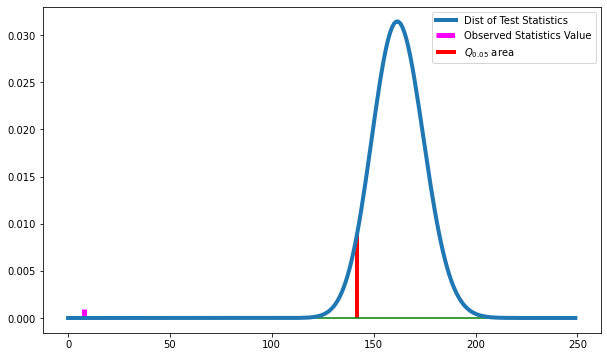

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(x= numbers, y=binom_dist, linewidth=4)
plt.vlines(8, ymin = 0, ymax= 0.001, colors='magenta', linestyles='dashed', linewidth=5)

q_alpha = binom.ppf(0.05, 21728, 0.00746)
plt.vlines(q_alpha,ymin=0, ymax=binom.pmf(q_alpha, 21728, 0.00746), color='r', linewidth=4)
    

plt.hlines(0, xmin = min(numbers), xmax=max(numbers), colors='g')
plt.legend(['Dist of Test Statistics', 'Observed Statistics Value', '$Q_{0.05}$ area']);

The blue line indicates the Binomial distribution under the assumption of the Null hypothesis. The red line is the position of the 0.05 quantile or the significance level of this test. If the test statistic falls left of that line, we reject the null. The magenta dot is the test statistic.

## Test:

From the treatment group data, we can see that the test statistics or total number of infected is 8. Which is much smaller than the $q_{0.05}=142$. We can safely reject the null hypothesis. Another way of finding the statistical significance is using p-value. P-value is the cumulative probability that the test statistics is lower than the value observed.

In [7]:
print("The P-value for this study result is %0.5f"%(binom.cdf(8, 21728, 0.00746)))

The P-value for this study result is 0.00000


A commong practice among the statistics community is that a p-value less than 0.05 is a good measure of  statistical significance. Choosing a significance level 0.05 and checking for a p-value less that 0.05 mathematically checks the same thing.
Another important thing to note that we have a habit of taking p-value as a determining factor of a scientific discovery. We should interpret the result carefully and should avoid using p-value without proper context. The article [*The ASA's Statement on p-Values: Context, Process, and Purpose* by **Wasserstein & Lazar**](https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#.WBCslMmJQ20) is a helpful guideline on this matter.

# Appendix:

### 1. Bernoulli Random variable:
An example of Bernoulli random numbers is the outcome of a coin toss. Let's model getting a head in a toss as 1 and a tail as 0. The outcome of the toss is a Bernoulli Random variable. If the probability of getting a head is $\pi$, the probability of getting a tail is $1-\pi$

### 2. Binomial Random variable:
Binomial random number can be thought of the total of multiple coin toss. If all the coin are identical, they will have the same bias. Then the total outcome of how many heads or tails is a Binomial random variable.